In [1]:
import random

import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import flax.linen as nn

from priorCVAE.models import CNNDecoder
from priorCVAE.utility import load_model_params

In [2]:
output_dir = "../outputs/dgbar4ew/model/"

In [3]:
params = load_model_params(output_dir)
decoder_params = params['decoder']

In [4]:
latent_dim = 30
n = 12

key = jax.random.PRNGKey(random.randint(0, 9999))
rng, z_rng = jax.random.split(key, 2)
z = jax.random.normal(z_rng, (n, latent_dim))

decoder = CNNDecoder(conv_features=[5, 3, 1], conv_kernel_size=[[2, 2], [2, 2], [5, 5]], conv_stride=[2, 2, 1],
                     hidden_dim=[120, 300], decoder_reshape=(7, 7, 8), out_channel=1, conv_activation=nn.tanh)
out = decoder.apply({'params': decoder_params}, z)

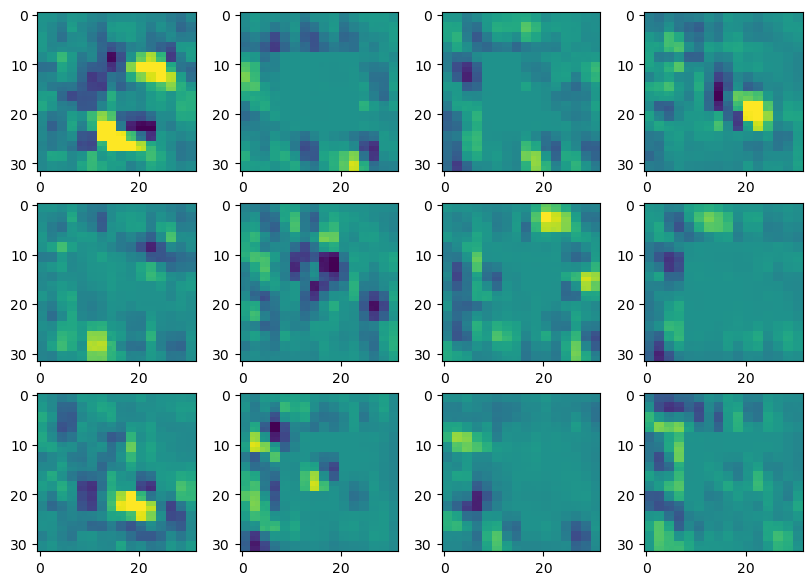

In [6]:
fig, axs = plt.subplots(3, 4, figsize=(10, 7))

for i in range(n):
    rows = int(i/4)
    cols = int(i%4)
    
    axs[rows][cols].imshow(out[i].reshape((32, 32)), vmin=0, vmax=1)

## Plot histogram

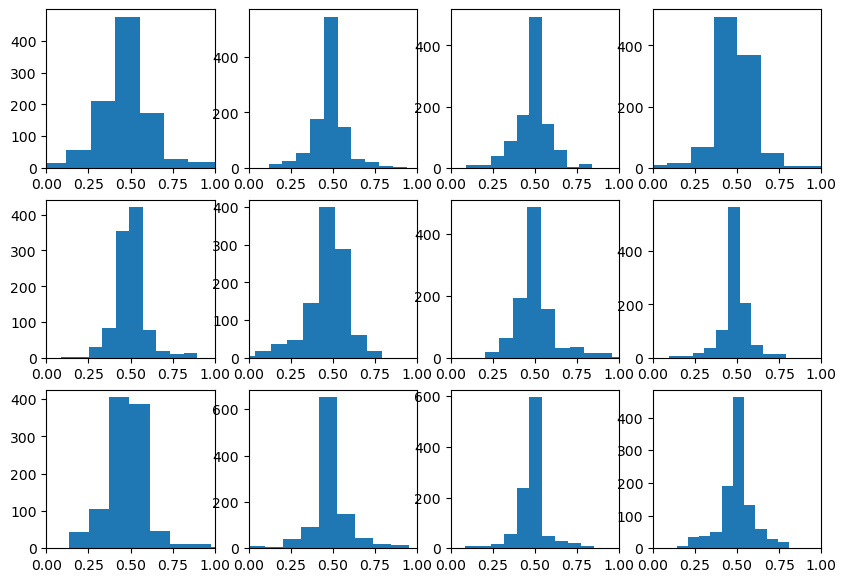

In [7]:
fig, axs = plt.subplots(3, 4, figsize=(10, 7))
for i, d in enumerate(out):
    rows = int(i//4)
    cols = int(i%4)
    axs[rows][cols].hist(d.reshape((-1,)))
    axs[rows][cols].set_xlim([0, 1])

In [8]:
key = jax.random.PRNGKey(random.randint(0, 9999))
rng, z_rng = jax.random.split(key, 2)
z = jax.random.normal(z_rng, (10000, latent_dim))

out_hist = decoder.apply({'params': decoder_params}, z)

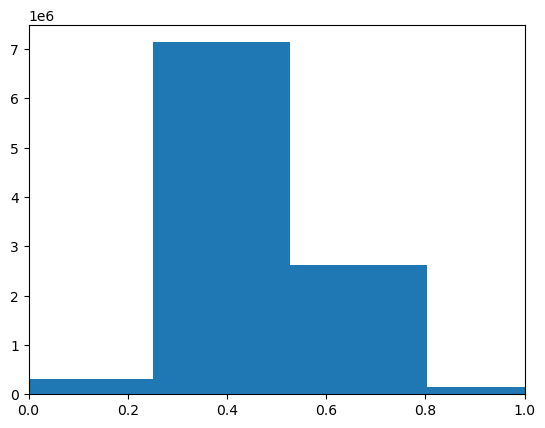

In [9]:
plt.hist(out_hist.reshape((-1,)))
plt.xlim([0, 1])
plt.show()

## Mean

In [10]:
mean_prior_data = jnp.mean(out_hist, axis=0)

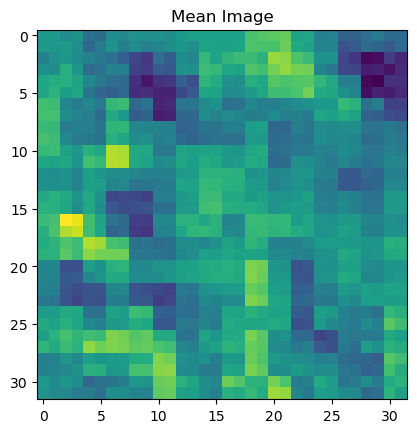

In [11]:
plt.imshow(mean_prior_data.reshape((32, 32)))
plt.title("Mean Image")
plt.show()